In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [27]:
clear_night_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_ctl.csv')
clear_night_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_cvip.csv')
clear_night_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_traj.csv')

clear_sunset_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_ctl.csv')
clear_sunset_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_cvip.csv')
clear_sunset_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_traj.csv')

clear_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_ctl.csv')
clear_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_cvip.csv')
clear_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_traj.csv')

rain_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_ctl.csv')
rain_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_cvip.csv')
rain_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_traj.csv')

Task 1.1.) List the first 5 rows of the csv firles for the clear-night weather condition

In [3]:
clear_night_ctl.head()

,ts,agent_id,throttle,steer,brake
0,15547837,0,0.9,-0.001013,0.0
1,15547838,0,0.9,-0.010019,0.0
2,15547839,0,0.9,-0.006061,0.0
3,15547840,0,0.9,-0.007578,0.0
4,15547841,0,0.9,-0.001617,0.0


In [4]:
clear_night_cvip.head()

,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z
0,15547837,0,500.491189,198.767441,-95.832657,-499.819366
1,15547838,0,5.595580,195.567444,-90.832657,0.100000
2,15547839,0,5.592365,195.567444,-90.832657,0.095407
3,15547840,0,5.589578,195.567444,-90.832657,0.084691
4,15547841,0,5.587154,195.567444,-90.832657,0.069311


In [5]:
clear_night_traj.head()

,ts,agent_id,x,y,z,v
0,15547837,0,192.362411,-86.26268,0.539326,0.0
1,15547838,0,192.362411,-86.26268,0.491906,0.0
2,15547839,0,192.362411,-86.26268,0.438374,0.0
3,15547840,0,192.362411,-86.26268,0.378732,0.0
4,15547841,0,192.362411,-86.26268,0.312981,0.0


In [6]:
clear_sunset_ctl.head()

,ts,agent_id,throttle,steer,brake
0,15544980,0,0.9,-0.011949,0.0
1,15544981,0,0.9,-0.002197,0.0
2,15544982,0,0.9,0.001736,0.0
3,15544983,0,0.9,-0.003675,0.0
4,15544984,0,0.9,-0.000116,0.0


In [7]:
clear_noon_ctl.head()

,ts,agent_id,throttle,steer,brake
0,15543489,0,0.9,0.001954,0.0
1,15543490,0,0.9,0.002261,0.0
2,15543491,0,0.9,0.003427,0.0
3,15543492,0,0.9,0.003108,0.0
4,15543493,0,0.9,0.003524,0.0


Task 1.2. summarizing information for each weather condition

Durations

In [8]:
def get_duration(ctl):
  times = ctl['ts']
  return times.iloc[-1] - times.iloc[0]

clear_night_duration = get_duration(clear_night_ctl)
clear_sunset_duration = get_duration(clear_sunset_ctl)
clear_noon_duration = get_duration(clear_noon_ctl)
rain_noon_duration = get_duration(rain_noon_ctl)

print('clear-night: %f, clear-sunset: %f, clear-noon: %f, rain-noon: %f' % (clear_night_duration, clear_sunset_duration, clear_noon_duration, rain_noon_duration))

clear-night: 926.000000, clear-sunset: 757.000000, clear-noon: 751.000000, rain-noon: 404.000000


Mean and Standard Deviations

In [9]:
summary_df = pd.DataFrame()

# Helper function to get the information for each condition's dataframe
def add_summary(ctl, cvip, traj, df_name):

  # Getting values from ctl dataframe
  ctl_means = ctl.mean(axis=0)
  ctl_stds = ctl.std(axis=0)
  summary_df.loc['throttle', df_name + ' mean'] = ctl_means['throttle']
  summary_df.loc['throttle', df_name + ' std'] = ctl_stds['throttle']
  summary_df.loc['steer', df_name + ' mean'] = ctl_means['steer']
  summary_df.loc['steer', df_name + ' std'] = ctl_stds['steer']
  summary_df.loc['brake', df_name + ' mean'] = ctl_means['brake']
  summary_df.loc['brake', df_name + ' std'] = ctl_stds['brake']

  # Getting values from cvip dataframe
  summary_df.loc['cvip', df_name + ' mean'] = cvip.mean()['cvip']
  summary_df.loc['cvip', df_name + ' std'] = cvip.mean()['cvip']

  # Getting values from traj dataframe
  traj_means = traj.mean(axis=0)
  traj_stds = traj.std(axis=0)
  summary_df.loc['x', df_name + ' mean'] = traj_means['x']
  summary_df.loc['x', df_name + ' std'] = traj_stds['x']
  summary_df.loc['y', df_name + ' mean'] = traj_means['y']
  summary_df.loc['y', df_name + ' std'] = traj_stds['y']
  summary_df.loc['v', df_name + ' mean'] = traj_means['v']
  summary_df.loc['v', df_name + ' std'] = traj_stds['v']

add_summary(clear_night_ctl, clear_night_cvip, clear_night_traj, 'clear-night')
add_summary(clear_sunset_ctl, clear_sunset_cvip, clear_sunset_traj, 'clear-sunset')
add_summary(clear_noon_ctl, clear_noon_cvip, clear_noon_traj, 'clear-noon')
add_summary(rain_noon_ctl, rain_noon_cvip, rain_noon_traj, 'rain-noon')

summary_df = summary_df.round(3)
summary_df


,clear-night mean,clear-night std,clear-sunset mean,clear-sunset std,clear-noon mean,clear-noon std,rain-noon mean,rain-noon std
throttle,0.616,0.341,0.610,0.282,0.608,0.283,0.637,0.275
steer,0.003,0.066,0.000,0.006,0.001,0.006,-0.001,0.003
brake,0.122,0.327,0.057,0.231,0.059,0.235,0.047,0.212
cvip,39.506,39.506,20.107,20.107,19.409,19.409,7.095,7.095
x,189.727,2.851,192.940,0.398,192.916,0.403,192.646,0.269
y,-25.546,40.433,-31.128,40.475,-31.366,40.570,-63.407,21.537
v,5.668,2.588,6.884,3.307,6.936,3.279,6.390,3.882


Task 1.3

In [19]:
import seaborn as sns
sns.set_theme()

def plot_feature(feature, ctl=False, cvip=False, traj=False, histogram=False):

  # Getting y feature and ts values from the dataframes
  clear_night_ts = clear_night_ctl['ts']
  clear_sunset_ts = clear_sunset_ctl['ts']
  clear_noon_ts = clear_noon_ctl['ts']
  rain_noon_ts = rain_noon_ctl['ts']

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]

  elif cvip:

    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  
  else:

    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]


  # Setting the timestamp data to start at 0
  clear_night_ts = clear_night_ts - clear_night_ts[0]
  clear_sunset_ts = clear_sunset_ts - clear_sunset_ts[0]
  clear_noon_ts = clear_noon_ts - clear_noon_ts[0]
  rain_noon_ts = rain_noon_ts - rain_noon_ts[0]

  if histogram:

    plt.hist(clear_night_ts, clear_night_y)
    plt.hist(clear_sunset_ts, clear_sunset_y)
    plt.hist(clear_noon_ts, clear_noon_y)
    plt.hist(rain_noon_ts, rain_noon_y)

  else:

    plt.plot(clear_night_ts, clear_night_y, label='clear-night')
    plt.plot(clear_sunset_ts, clear_sunset_y, label='clear-sunset')
    plt.plot(clear_noon_ts, clear_noon_y, label='clear-noon')
    plt.plot(rain_noon_ts, rain_noon_y, label='rain-noon')

  plt.xlabel('Timestamp')
  plt.ylabel(feature)
  plt.title(feature + ' of car for various weather conditions')
  plt.legend()
  plt.show()



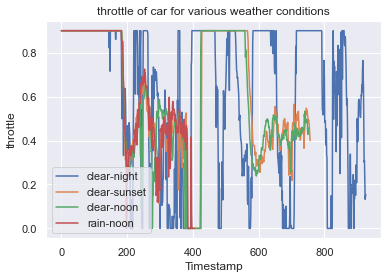

In [22]:
plot_feature('throttle', ctl=True)

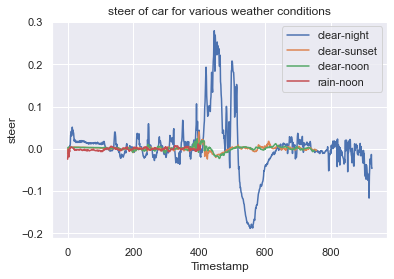

In [21]:
plot_feature('steer', ctl=True)

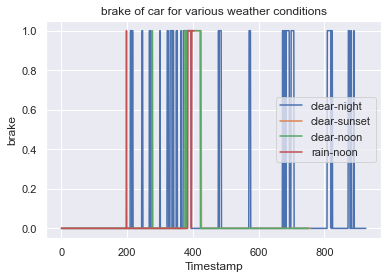

In [24]:
plot_feature('brake', ctl=True)

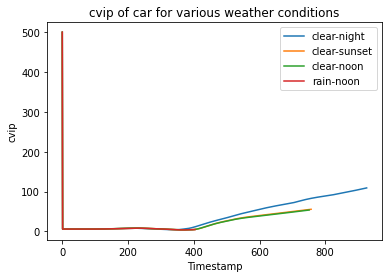

In [14]:
plot_feature('cvip', cvip=True)

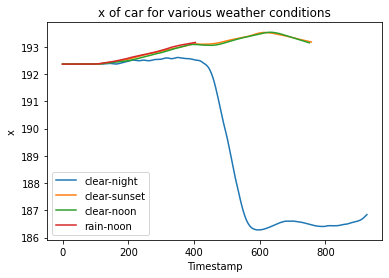

In [15]:
plot_feature('x', traj=True)

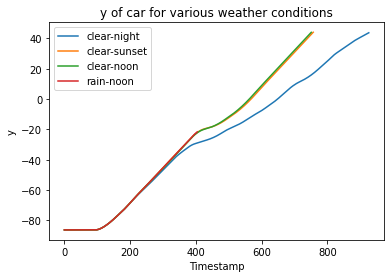

In [16]:
plot_feature('y', traj=True)

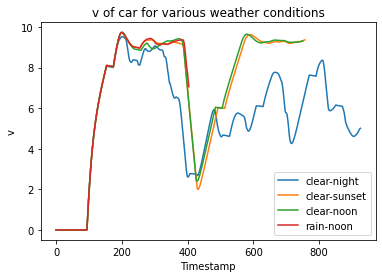

In [17]:
plot_feature('v', traj=True)

1.4.

Based on my intuition, when an accident occurs there is initially a sudden push on the breaks and a sharp decrease in speed as the driver makes an attempt to not have a collision. There could also be erratic movement of the steering wheel from side to side as the car tries to avade the accident.

From the visualization of the data it seems that an accident occurs during the rain-noon weather condition as there are two sudden pressings of the break and a decrease in speed. The data also stops before the other weather conditions such that the car was in an accident and stopped collecting data.

It also looks like an accident, or a near miss occurs in the clear-night weather conditon do to the erratic steering data. It seems as if the AV started swerving back and forth to avoid an accident.

2.1

From the 5 simulated scenarios only 1 resulted in an accident. Therefore the marginal probability of an accident ocurring is 0.2.

2.2

From the completion records the accident happened during the rain-noon weather condition. This was what we predicted from the simulation data. It makes sense that the accident occurs during the weather event of rain as it lowers visibility. While we would expect noon to have the most visibility time wise, since it was the only rain simulation in the data it seems the weather has a larger effect than time.

2.3

Density Plot

In [54]:
# Helper function for creating the density plot of a certain feature
def get_density_plot(feature, ctl=False, cvip=False, traj=False):

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]
  elif cvip:
    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  else:
    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]

  sns.set(rc = {'figure.figsize': (10,5)})
  sns.kdeplot(clear_night_y, label='clear-night', fill=True)
  sns.kdeplot(clear_sunset_y, label='clear-sunset', fill=True)
  sns.kdeplot(clear_noon_y, label='clear-noon', fill=True)
  sns.kdeplot(rain_noon_y, label='rain-noon', fill=True)

  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.title(feature)
  plt.legend()

  
  plt.show()


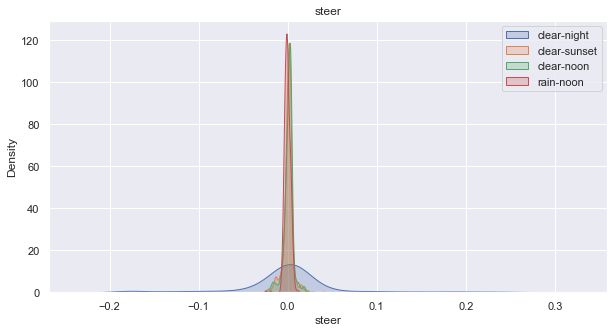

In [55]:
get_density_plot('steer', ctl=True)

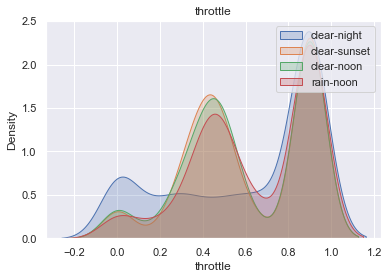

In [45]:
get_density_plot('throttle', ctl=True)

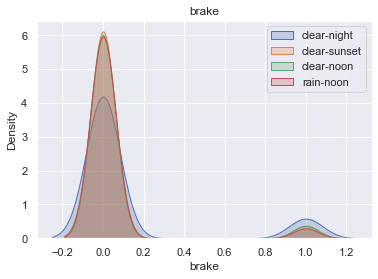

In [46]:
get_density_plot('brake', ctl=True)

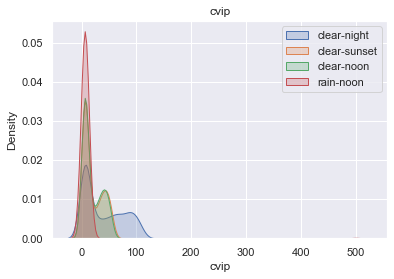

In [48]:
get_density_plot('cvip', cvip=True)

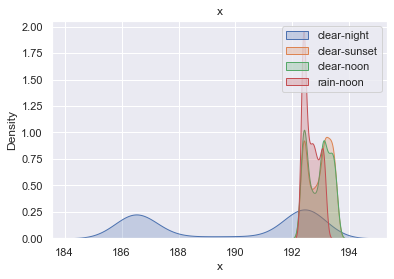

In [49]:
get_density_plot('x', traj=True)

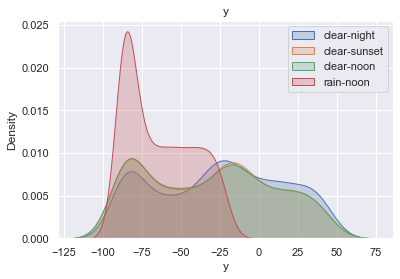

In [50]:
get_density_plot('y', traj=True)

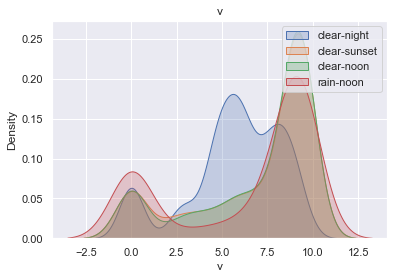

In [51]:
get_density_plot('v', traj=True)

In [60]:
clear_night_steer = clear_night_ctl['steer']
clear_sunset_steer = clear_sunset_ctl['steer']
scipy.stats.ttest_ind(clear_night_steer, clear_sunset_steer, equal_var=False)

Ttest_indResult(statistic=1.4197131653710726, pvalue=0.15602201981398442)